In [79]:
import numpy as np
import sep

In [80]:
# additional setup for reading the test image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [81]:
# read image into standard 2-d numpy array
data = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data = data[0].data
data = data.byteswap().newbyteorder()

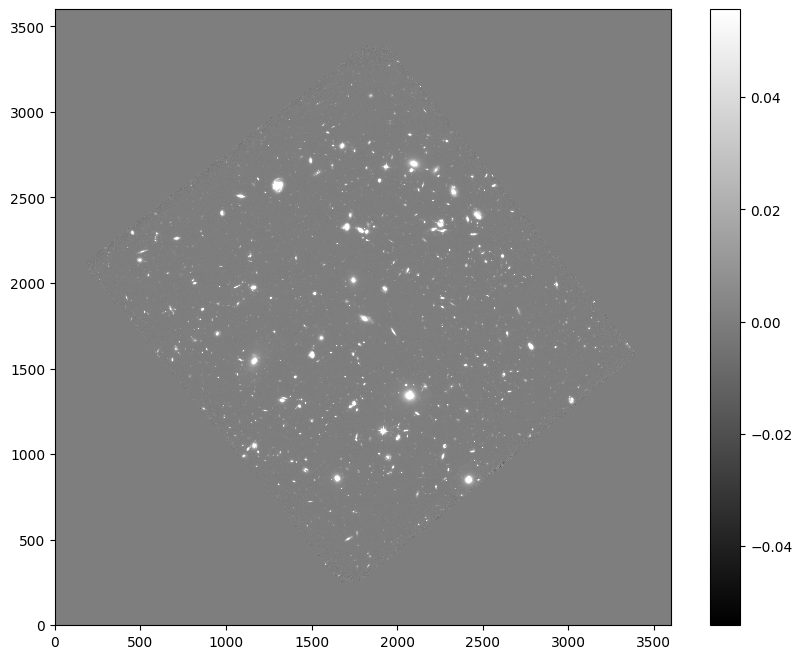

In [82]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('pretzel.png', bbox_inches='tight',facecolor='white')

In [83]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [84]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [85]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

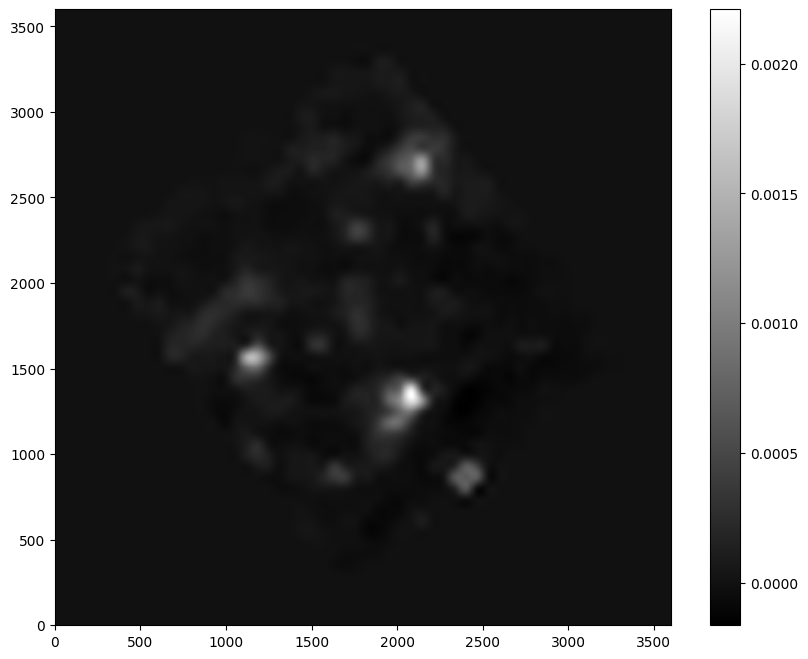

In [86]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('face.png', bbox_inches='tight',facecolor='white')

In [87]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

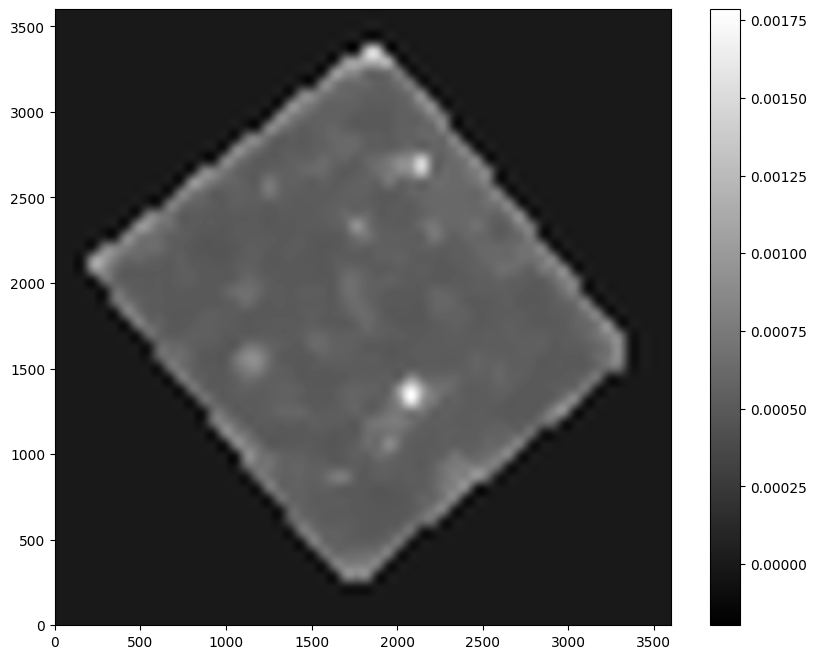

In [88]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('dorito.png', bbox_inches='tight',facecolor='white')

In [89]:
# subtract the background
data_sub = data - bkg


In [90]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [91]:
# how many objects were detected
len(objects)

8646

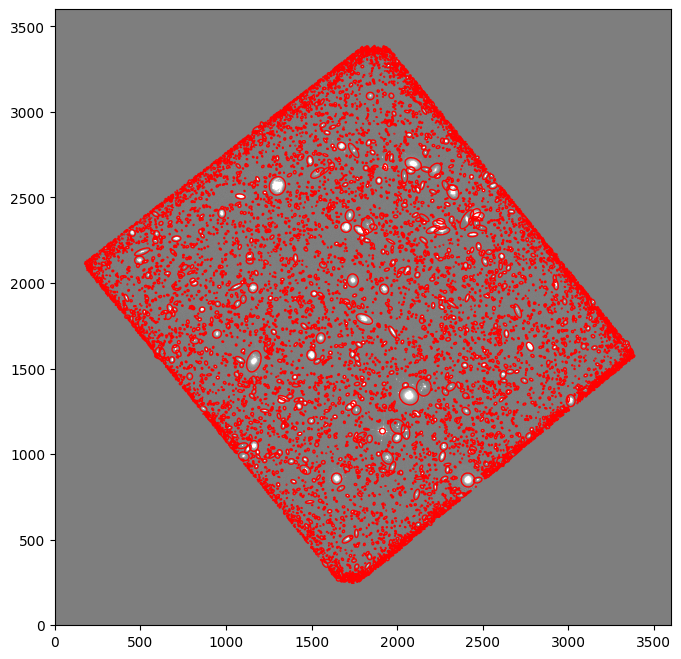

In [92]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.savefig('unknown.png', bbox_inches='tight',facecolor='white')

In [93]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [94]:
import statistics
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)


<function matplotlib.pyplot.show(close=None, block=None)>

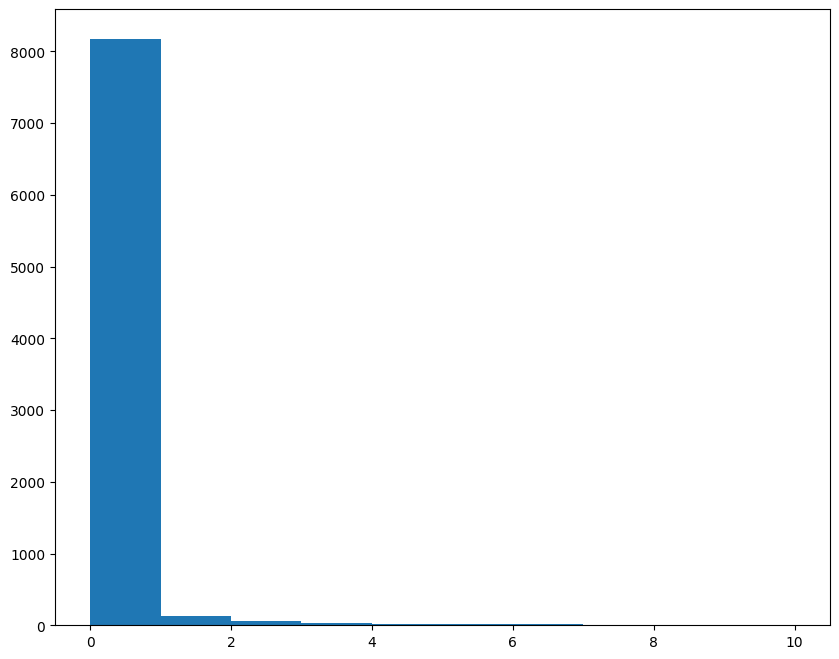

In [95]:
bins = [0,1,2,3,4,5,6,7,8,9,10]
plt.hist(flux, bins=bins)
plt.show


In [96]:
#find standard deviation of flux
print(statistics.stdev(flux))
#find mean of flux
print(statistics.mean(flux))
#find median of flux
print(statistics.median(flux))

9.240816765753792
0.36159539075495284
0.03097589430617518


In [97]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))



object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


In [98]:
fdata_105 = 'hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits'
fdata_125 = 'hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits'
fdata_160 = 'hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits'

hdu2 = fits.open(fdata_105)
hdu3 = fits.open(fdata_125)
hdu4 = fits.open(fdata_160)

data2 = hdu2[0].data
data3 = hdu3[0].data
data4 = hdu4[0].data

In [99]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

In [100]:
def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp,vpmin,vpmax= rescale_image(data)
    plt.imshow(pdata,vmin=vpmin,vmax=vpmax)

In [101]:
data2res,d2min,d2max = rescale_image(data2)
data3res,d3min,d3max = rescale_image(data3)
data4res,d4min,d4max = rescale_image(data4)

In [102]:
data2res[data2res<d2min]=d2min
data2res[data2res>d2max]=d2max
data3res[data3res<d3min]=d3min
data3res[data3res>d3max]=d3max
data4res[data4res<d4min]=d4min
data4res[data4res>d4max]=d4max

In [103]:
rgb = np.zeros((data2res.shape[0],data2res.shape[1],3))
rgb[:,:,0] = (data2res-d2min)/(d2max-d2min)
rgb[:,:,1] = (data3res-d3min)/(d3max-d3min)
rgb[:,:,2] = (data4res-d4min)/(d4max-d4min)

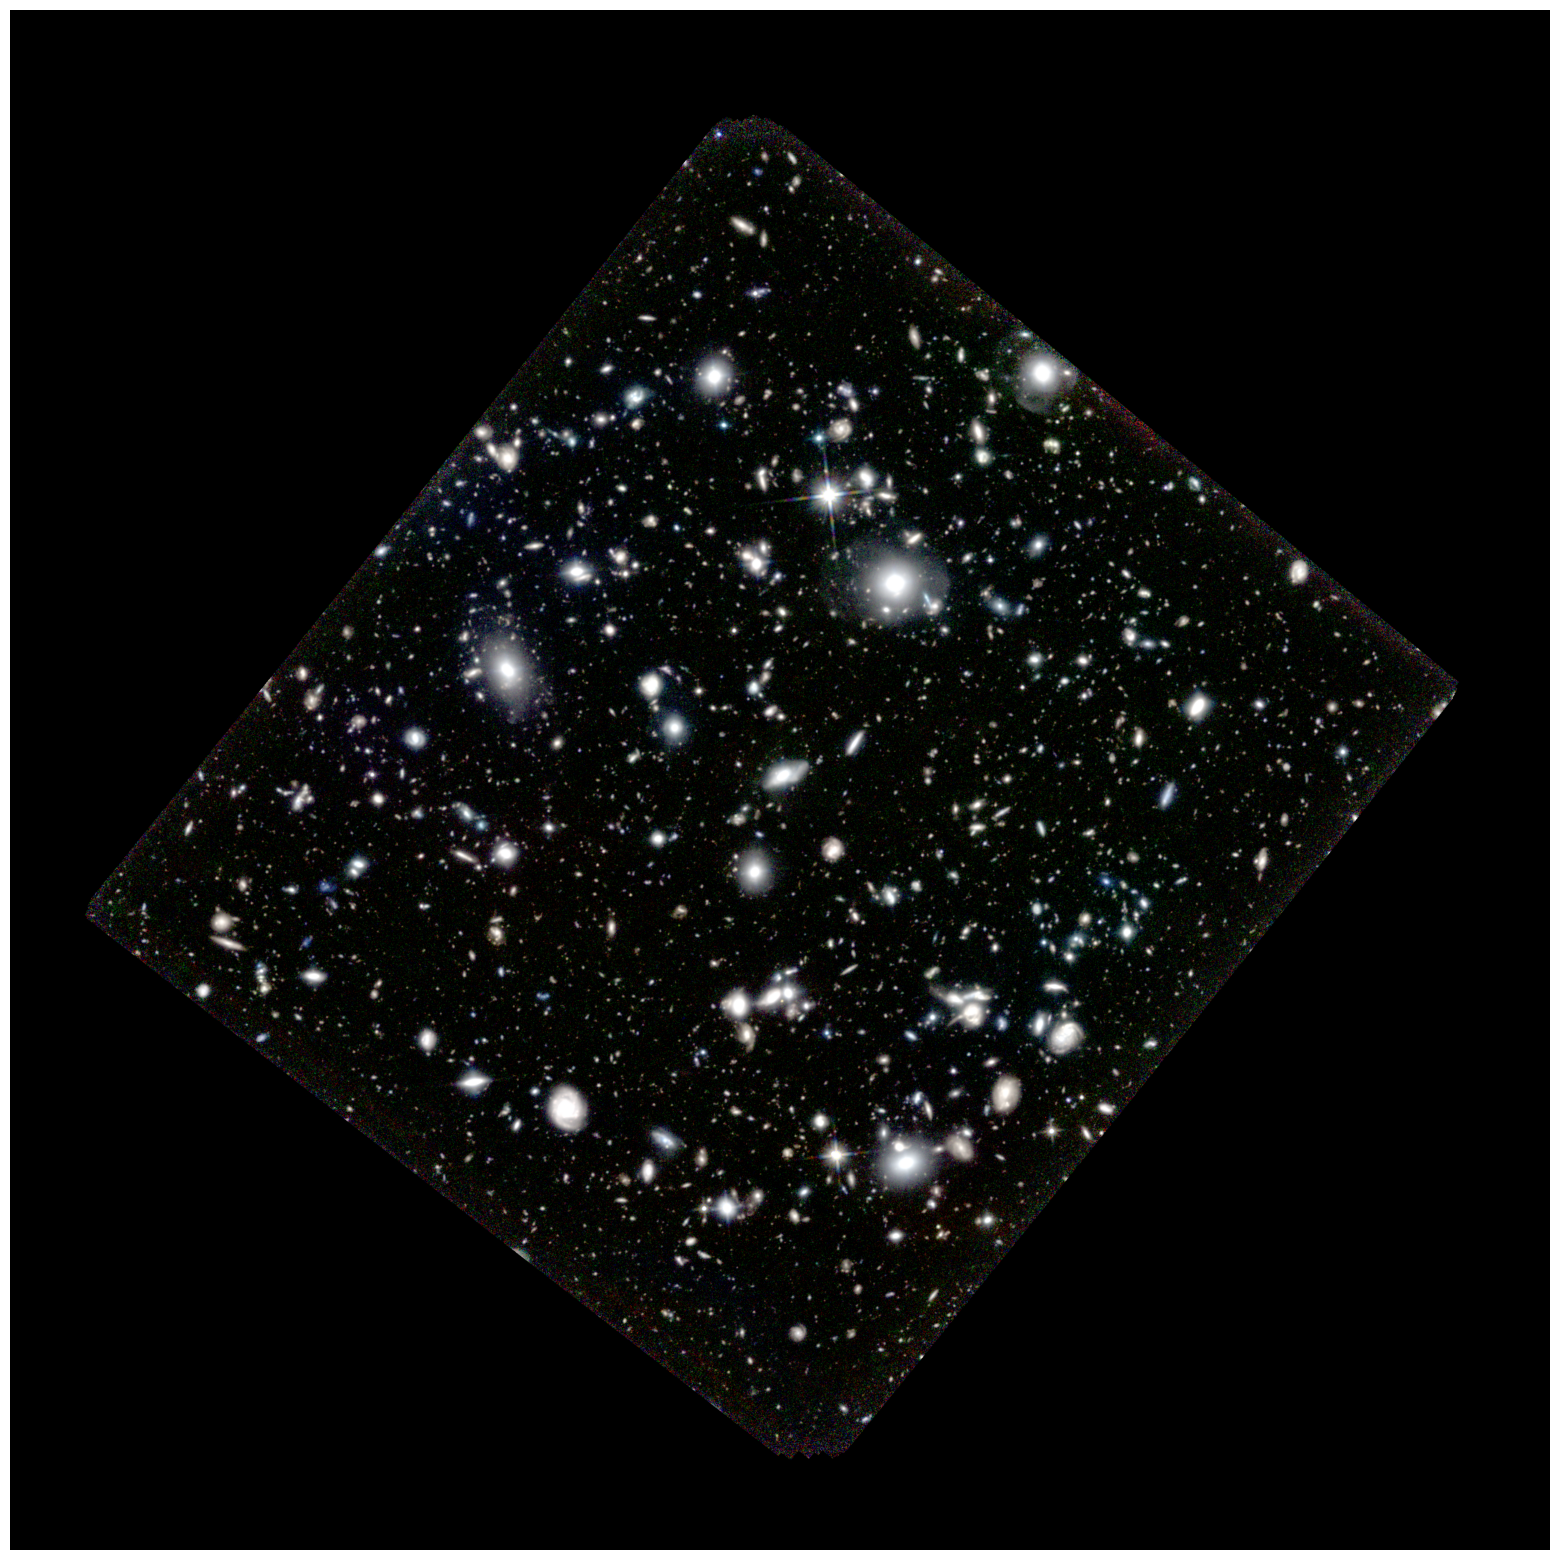

In [104]:
f,ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow((rgb * 255).astype(np.uint8))
plt.savefig('finalrgb.png', bbox_inches='tight', pad_inches=0, dpi=600)